In [1]:
import tweepy
#https://unipython.com/analisis-de-sentimientos-con-textblob-y-vader/?fbclid=IwAR37soIitBrJnkdwAvpcsqCvDqjR9YNqGdjz_DJF0hA8GE66BbK05DY1W6A
#Credenciales de desarrollador que se obtienen en https://apps.twitter.com/
CONSUMER_KEY = "vMyqpV56128gNM0stK7KJROUi"
CONSUMER_SECRET = "xYg7S7KZAtek8CvMeRtk0Sw0uBTw0NNwQLI3qHPYS5mVIjjO71"
ACCESS_TOKEN = "1137498726-j6OAdMTAahe4XAc1DStb30lUGILwPnog708Fxoj"
ACCESS_TOKEN_SECRET = "4iQgn1hA19OwUMIgstFgbzmgB3OZMbMUZgN5wVOuUfwaA"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

In [2]:
### TRADUCTOR!!!!!!!!!!!!!!!!!!
import requests
def Traduccion(source, target, text):
    parametros = {'sl': source, 'tl': target, 'q': text}
    cabeceras = {"Charset":"UTF-8","User-Agent":"AndroidTranslate/5.3.0.RC02.130475354-53000263 5.1 phone TRANSLATE_OPM5_TEST_1"}
    url = "https://translate.google.com/translate_a/single?client=at&dt=t&dt=ld&dt=qca&dt=rm&dt=bd&dj=1&hl=es-ES&ie=UTF-8&oe=UTF-8&inputm=2&otf=2&iid=1dd3b944-fa62-4b55-b330-74909a99969e"
    response = requests.post(url, data=parametros, headers=cabeceras)
    if response.status_code == 200:
        for x in response.json()['sentences']:
            return x['trans']
    else:
        return "Ocurrió un error"


def _traducir (texto):
    nuevo_texto=""
    i = 0
    for t in texto.split(" "):
        t = Traduccion("es", "en", t)
        if (i == 0 ):
            nuevo_texto = nuevo_texto + t
            i+=1
        else:
            nuevo_texto = nuevo_texto + " " + t
        
    return nuevo_texto
    
_traducir(".hola mundo... como estas?")

'.Hello world... how these?'

In [3]:
import matplotlib.pyplot as plt
import numpy as np



In [4]:
from textblob import TextBlob

def get_stuff(nombre=None):
    stuff = tweepy.Cursor(api.user_timeline, screen_name = nombre, include_rts = True,tweet_mode='extended')
    return stuff


def get_tweets(stuff, n , traducir):
    
    lista1 = []
    lista2 = []
    i = 0
    for status in stuff.items(n):
        pos_count = 0.0
        pos_correct = 0.0

        neg_count = 0
        neg_correct = 0
        
        #print(status.created_at, status.author.screen_name, status.text)
        i += 1
        print ("\n\nTWEET NUMERO : ", i, "########################################################################")
        
        print ("\n\nNombre :\n\n", status.author.screen_name )
        texto = status.full_text
        if traducir:
            print ("\nantes   =", texto)
            texto = _traducir(texto)
            print ("\ndespues =", texto)
        else:
            print ("\ntweet :\n\n", texto)
            
        for text in texto.split('\n' or ','):
            analysis = TextBlob(text)
            if analysis.sentiment.polarity > 0:
                pos_correct += 1
            pos_count +=1
            
            if analysis.sentiment.polarity <= 0:
                neg_correct += 1
            neg_count +=1
            
        print("\nSentimiento positivo = ",(pos_correct/pos_count)*100.0, "%")
        lista1.append((pos_correct/pos_count)*100.0)
        print("Sentimiento negativo = ",(neg_correct/neg_count)*100.0 ,"%")
        lista2.append((neg_correct/neg_count)*100.0)
    
    lista1 = lista1[::-1]
    plt.plot(lista1)
    plt.title("SENTIMIENTO POSITIVO")
    plt.ylabel("positivo")
    plt.xlabel("instancias de emociones")
    plt.show()
    
    lista2 = lista2[::-1]
    plt.plot(lista2)
    plt.title("SENTIMIENTO NEGATIVO")
    plt.ylabel("negativo")
    plt.xlabel("instancias de emociones")
    plt.show()
    print ("lista 1 = ", lista1)
    print ("lista 2 = ", lista2)
        


Cuantos tweets desea obtener: 3


TWEET NUMERO :  1 ########################################################################


Nombre :

 kleysonklaus

antes   = estoy muy triste! :(

despues = am very sad! :(

Sentimiento positivo =  0.0 %
Sentimiento negativo =  100.0 %


TWEET NUMERO :  2 ########################################################################


Nombre :

 kleysonklaus

antes   = estoy muy feliz!

despues = am very happy!

Sentimiento positivo =  100.0 %
Sentimiento negativo =  0.0 %


TWEET NUMERO :  3 ########################################################################


Nombre :

 kleysonklaus

antes   = prueba de análisis de sentimiento:

Los pensamientos positivos nos ayudan a seguir adelante, mantén en mente que tus sueños jamás caducarán, que pueden permanecer latentes en tu corazón y salir adelante cuando tiras de ellos hacia fuera y los haces brillar.

despues = proof from analysis from feeling:

 thoughts positive us help to follow ahead, keep in mind 

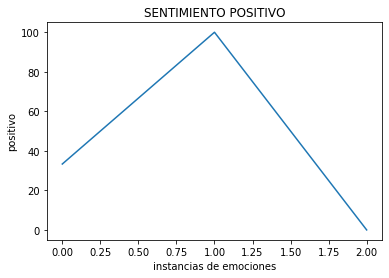

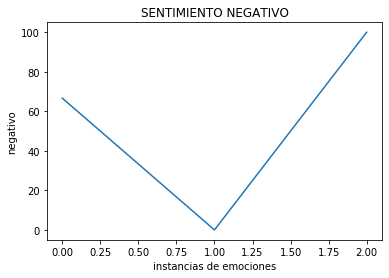

lista 1 =  [33.33333333333333, 100.0, 0.0]
lista 2 =  [66.66666666666666, 0.0, 100.0]


In [5]:
##################################### OBTENER TWEETS DESDE MI PROPIO PERFIL ############
traducir = True

n = int(input('Cuantos tweets desea obtener: '))
stuff = get_stuff()
get_tweets(stuff, n , traducir)

Ingrese el nombre del usuario: openai
Cuantos tweets desea obtener: 4


TWEET NUMERO :  1 ########################################################################


Nombre :

 OpenAI

tweet :

 In case you missed it, here’s the unedited solve of the Rubik’s cube: https://t.co/Lre6otlwWi

Sentimiento positivo =  0.0 %
Sentimiento negativo =  100.0 %


TWEET NUMERO :  2 ########################################################################


Nombre :

 OpenAI

tweet :

 Human hands let us solve a wide variety of tasks. Even so, solving a Rubik's Cube one-handed isn't easy for humans. We're excited to continue to develop new AI technology and ultimately ensure that these systems benefit all of humanity. https://t.co/0ntSeJ5ueG

Sentimiento positivo =  100.0 %
Sentimiento negativo =  0.0 %


TWEET NUMERO :  3 ########################################################################


Nombre :

 OpenAI

tweet :

 "Solving the Rubik's Cube with a Robot Hand" took many human hands over the p

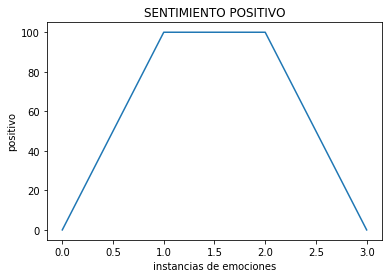

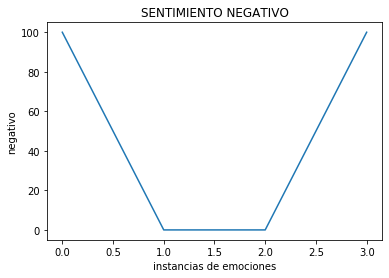

lista 1 =  [0.0, 100.0, 100.0, 0.0]
lista 2 =  [100.0, 0.0, 0.0, 100.0]


In [7]:
##################################### OBTENER TWEETS DESDE OTRO PERFIL ############
traducir = False
nombre = input('Ingrese el nombre del usuario: ')
n = int(input('Cuantos tweets desea obtener: '))
stuff = get_stuff(nombre)
get_tweets(stuff, n, traducir)